## Stock returns and drawdowns

This notebook simulates stock returns and provides better ways to estimate the maximum drawdown.

Let us download a stock and then look at some basic statistics

In [1]:
# Necessary imports

import pandas_datareader.data as web
import pandas as pd
import numpy as np
import yfinance as yf
import quantstats as qs
yf.pdr_override() # Fix to make pandas_datareader work properly in latest version
import seaborn as sns
sns.set()


In [2]:
# parameters - change the parameters here and run the notebook again

symbol = 'AAPL'
start_date = '2016-01-04'

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

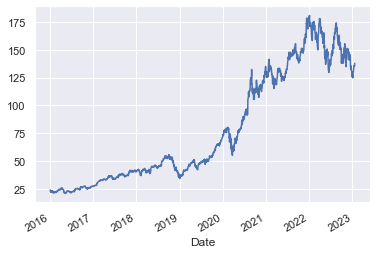

In [3]:
# Download data and print some stats

df = web.get_data_yahoo([symbol], start=start_date)
df['ret'] = df['Adj Close'].pct_change()
df['Adj Close'].plot()

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111496,270597600,NaN
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507278,223164000,-0.025059
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047251,273829600,-0.019570
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074553,324377600,-0.042205
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191280,283192000,0.005288


                    Strategy
------------------  ----------
Start Period        2016-01-04
End Period          2023-01-20
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   471.8%
CAGR﹪              28.06%

Sharpe              0.97
Prob. Sharpe Ratio  99.48%
Sortino             1.42
Sortino/√2          1.0
Omega               1.19

Max Drawdown        -38.52%
Longest DD Days     381

Gain/Pain Ratio     0.19
Gain/Pain (1M)      1.0

Payoff Ratio        1.04
Profit Factor       1.19
Common Sense Ratio  1.18
CPC Index           0.66
Tail Ratio          0.99
Outlier Win Ratio   3.85
Outlier Loss Ratio  4.01

MTD                 6.11%
3M                  -4.0%
6M                  -8.42%
YTD                 6.11%
1Y                  -16.58%
3Y (ann.)           20.79%
5Y (ann.)           27.87%
10Y (ann.)          28.06%
All-time (ann.)     28.06%

Avg. Drawdown       -4.17%
Avg. Drawdown Days  26
Recovery Factor     12.25
Ulcer Index         0.12
Serenity Index      3.

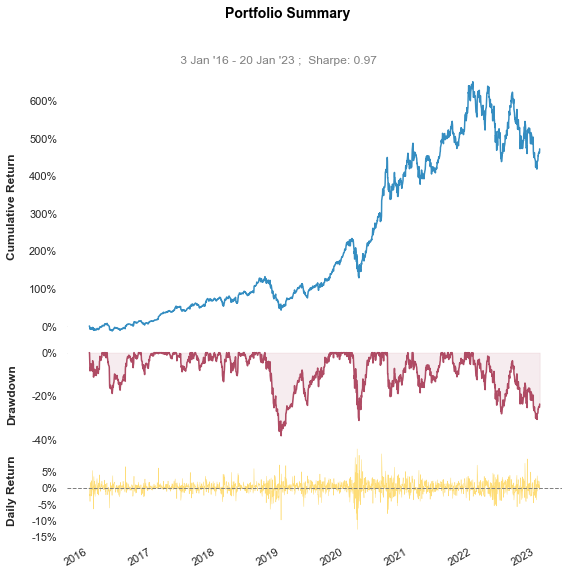

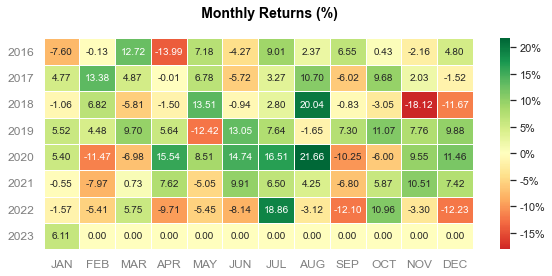

In [5]:
qs.reports.basic(df['Adj Close'])

### Shuffled drawdown


When we look at stock returns, we look at the specific path taken by the stock to reach the current level. But the stock would have taken any path to reach the current level. We can think of this as a route to reach some destination. There could be multiple routes to reach the destination and each route can be different. 

We would create a `shuffled_prices` function that shuffles the daily returns and gives a new price series. Note that the starting and ending value would be the same since the source and destination are the same, only the routes differ

In [6]:
def shuffled_prices(start_price, returns, index):
    np.random.shuffle(returns)
    s = start_price*(1+returns).cumprod()
    return pd.Series(s, index=index)

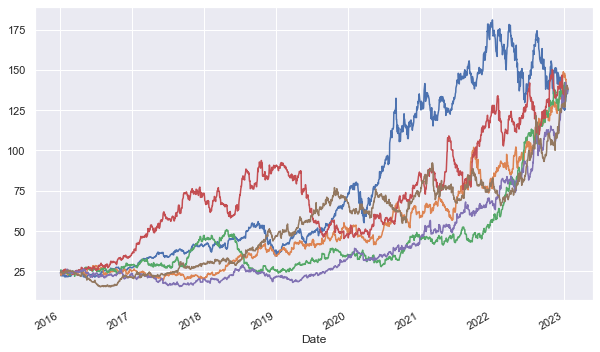

In [7]:
daily_returns = df.dropna()['ret'].values
start_value = df.iloc[0]['Adj Close']
index = df.index[1:] # since the first value is na we are excluding it
df['Adj Close'].plot(figsize=(10,6))
for i in range(5):
    s = shuffled_prices(start_value, daily_returns, index)
    s.plot()


### Sampled drawdown

We could randomly sample returns and then try to estimate the stock returns. This could give us an estimate of how given the same distribution of returns, how the stock price would have changed. We create a function `sampled_prices` that draws randomly with replacement from the given stock returns. 

We could note a big difference in prices

In [8]:
def sampled_prices(start_price, returns, index):
    rets = np.random.choice(returns, size=len(returns))
    s = start_price*(1+rets).cumprod()
    return pd.Series(s, index=index)

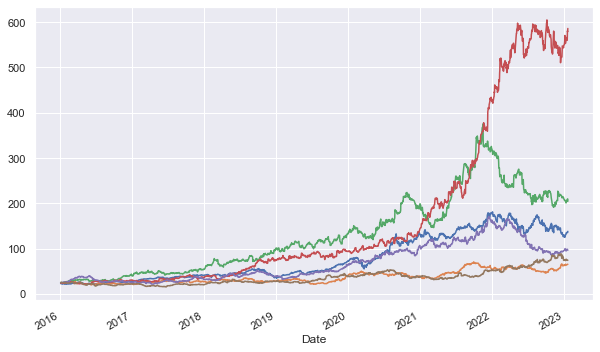

In [9]:
daily_returns = df.dropna()['ret'].values
start_value = df.iloc[0]['Adj Close']
index = df.index[1:] # since the first value is na we are excluding it
df['Adj Close'].plot(figsize=(10,6))
for i in range(5):
    s = sampled_prices(start_value, daily_returns, index)
    s.plot()
